In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Stores #

In [3]:
stores=pd.read_csv('stores.csv')

In [4]:
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [4]:
stores.shape

(54, 5)

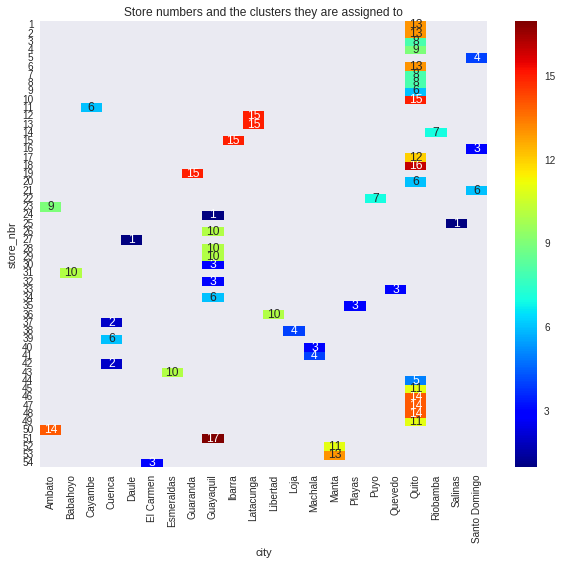

In [26]:
plt.figure(figsize=(10,8))
store_pivot = stores.dropna().pivot("store_nbr","city", "cluster")
ax = sns.heatmap(store_pivot, cmap='jet', annot=True, linewidths=0, linecolor='white')
plt.title('Store numbers and the clusters they are assigned to')

In [23]:
stores.cluster.value_counts()

3     7
6     6
10    6
15    5
14    4
13    4
1     3
11    3
8     3
4     3
2     2
9     2
7     2
5     1
16    1
12    1
17    1
Name: cluster, dtype: int64

In [27]:
stores.city.value_counts()

Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Manta             2
Latacunga         2
Ambato            2
Machala           2
Libertad          1
Loja              1
Ibarra            1
Esmeraldas        1
Puyo              1
Guaranda          1
Cayambe           1
Playas            1
Daule             1
Salinas           1
Babahoyo          1
Quevedo           1
Riobamba          1
El Carmen         1
Name: city, dtype: int64

### Takeaway: clusters 3,6,10 and 15 are the most common; Quito and Guayaquil  have lots of stores, others between 1 and 3 ###

In [45]:
stores.groupby(['state','city']).agg({'store_nbr':'size'})

store_nbr
state                          city                    
Azuay                          Cuenca                 3
Bolivar                        Guaranda               1
Chimborazo                     Riobamba               1
Cotopaxi                       Latacunga              2
El Oro                         Machala                2
Esmeraldas                     Esmeraldas             1
Guayas                         Daule                  1
                               Guayaquil              8
                               Libertad               1
                               Playas                 1
Imbabura                       Ibarra                 1
Loja                           Loja                   1
Los Rios                       Babahoyo               1
                               Quevedo                1
Manabi                         El Carmen              1
                               Manta                  2
Pastaza                        Puyo                   1
Pichincha                      Cayambe                1
                               Quito                 18
Santa Elena                    Salinas                1
Santo Domingo de los Tsachilas Santo Domingo          3
Tungurahua                     Ambato                 2

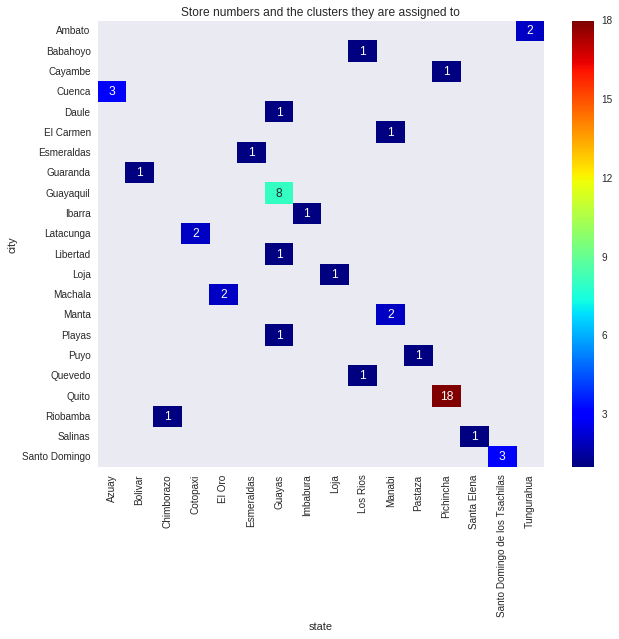

In [44]:
plt.figure(figsize=(10,8))
store_pivot = stores.groupby(['state','city']).agg({'store_nbr':'size'}).reset_index().pivot('city','state','store_nbr')

ax = sns.heatmap(store_pivot, cmap='jet', annot=True, linewidths=0, linecolor='white')
plt.title('Number of stores in each city ')

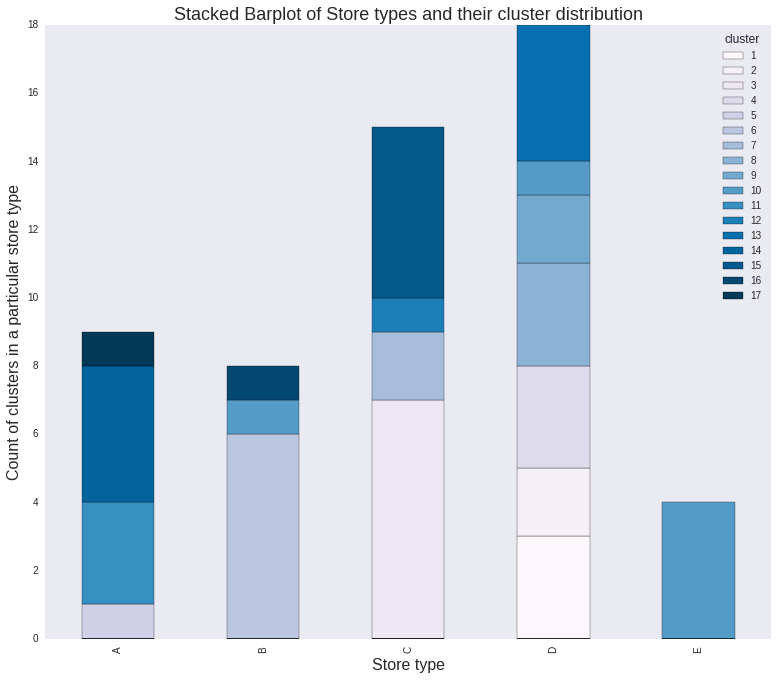

In [47]:
type_cluster = stores.groupby(['type','cluster']).size()
type_cluster.unstack().plot(kind='bar',stacked=True, colormap= 'PuBu', figsize=(13,11),  grid=False)
plt.title('Stacked Barplot of Store types and their cluster distribution', fontsize=18)
plt.ylabel('Count of clusters in a particular store type', fontsize=16)
plt.xlabel('Store type', fontsize=16)


In [55]:
stores.groupby(['type','cluster']).size()

type  cluster
A     5          1
      11         3
      14         4
      17         1
B     6          6
      10         1
      16         1
C     3          7
      7          2
      12         1
      15         5
D     1          3
      2          2
      4          3
      8          3
      9          2
      10         1
      13         4
E     10         4
dtype: int64

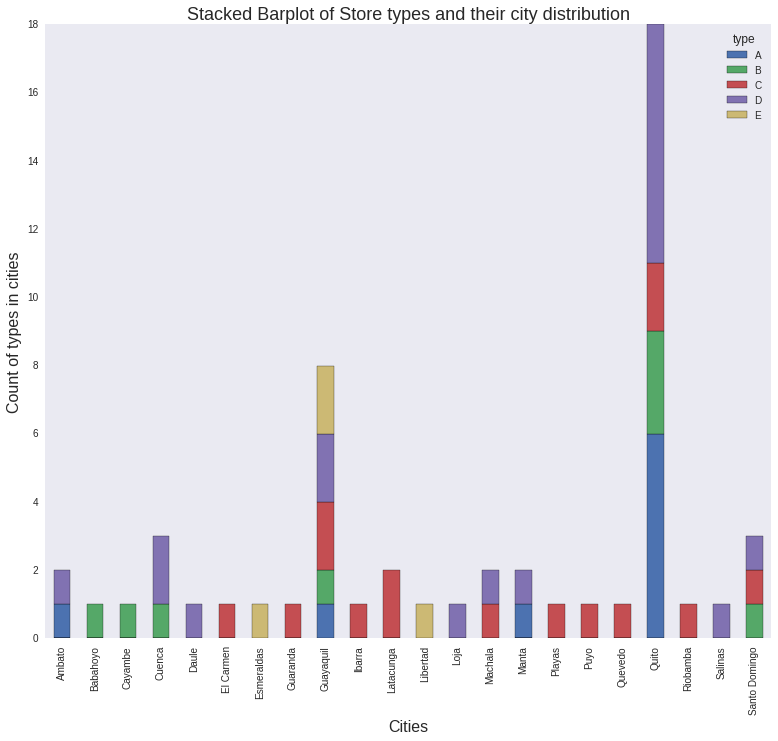

In [58]:
city_type= stores.groupby(['city','type']).size()
city_type.unstack().plot(kind='bar',stacked=True, figsize=(13,11),  grid=False)
plt.title('Stacked Barplot of Store types and their city distribution', fontsize=18)
plt.ylabel('Count of types in cities', fontsize=16)
plt.xlabel('Cities', fontsize=16)

### Obviolsy most diversity and number of shops is in big cities ###

# Oil #

In [63]:
oil=pd.read_csv('oil.csv',parse_dates=['date'])

In [64]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


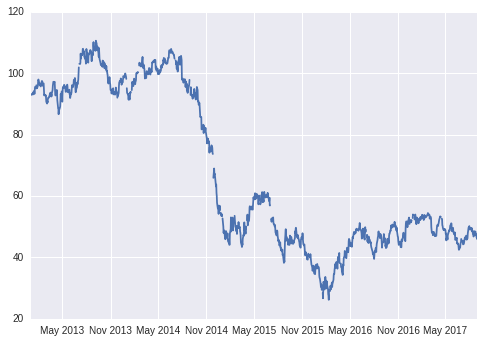

In [66]:
plt.plot(oil.date,oil.dcoilwtico)

In [68]:
test_data=pd.read_csv('test.csv',parse_dates=['date'])

In [69]:
test_data.head()

,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,False
1,125497041,2017-08-16,1,99197,False
2,125497042,2017-08-16,1,103501,False
3,125497043,2017-08-16,1,103520,False
4,125497044,2017-08-16,1,103665,False


In [119]:
test_data.date.min()

Timestamp('2017-08-16 00:00:00')

In [71]:
oil.date.max()

Timestamp('2017-08-31 00:00:00')

### the date for test are inside the oil dataset, good  ###

In [5]:
items=pd.read_csv('items.csv')

In [75]:
items.shape

(4100, 4)

In [76]:
items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [6]:
len(items['class'].unique())

337

In [7]:
len(items['family'].unique())

33

In [96]:
(items['class'].value_counts()>3).sum()

203

In [102]:
items.groupby('family').agg({'item_nbr':'size'})

,item_nbr
family,
AUTOMOTIVE,20
BABY CARE,1
BEAUTY,19
BEVERAGES,613
BOOKS,1
BREAD/BAKERY,134
CELEBRATION,31
CLEANING,446
DAIRY,242


In [104]:
items.groupby('class').agg({'item_nbr':'size'})

,item_nbr
class,
1002,31
1003,4
1004,39
1005,1
1006,12
1008,12
1010,22
1012,10
1013,2


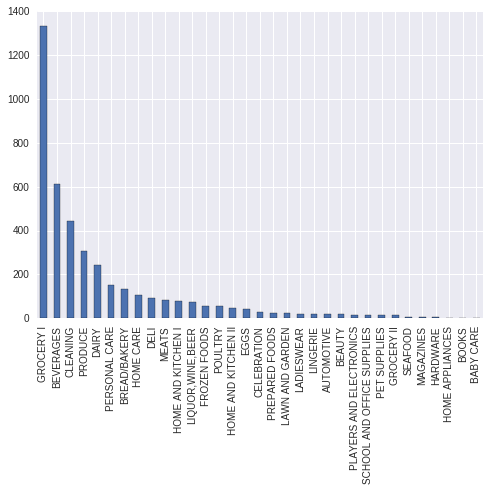

In [108]:
items['family'].value_counts().plot(kind='bar')

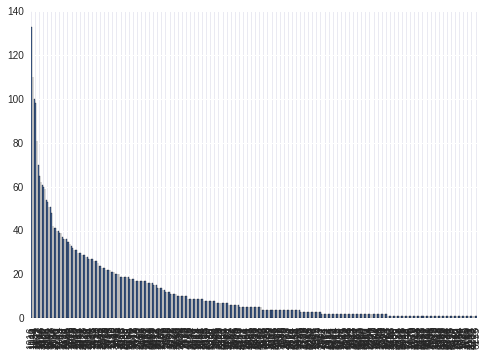

In [109]:
items['class'].value_counts().plot(kind='bar')

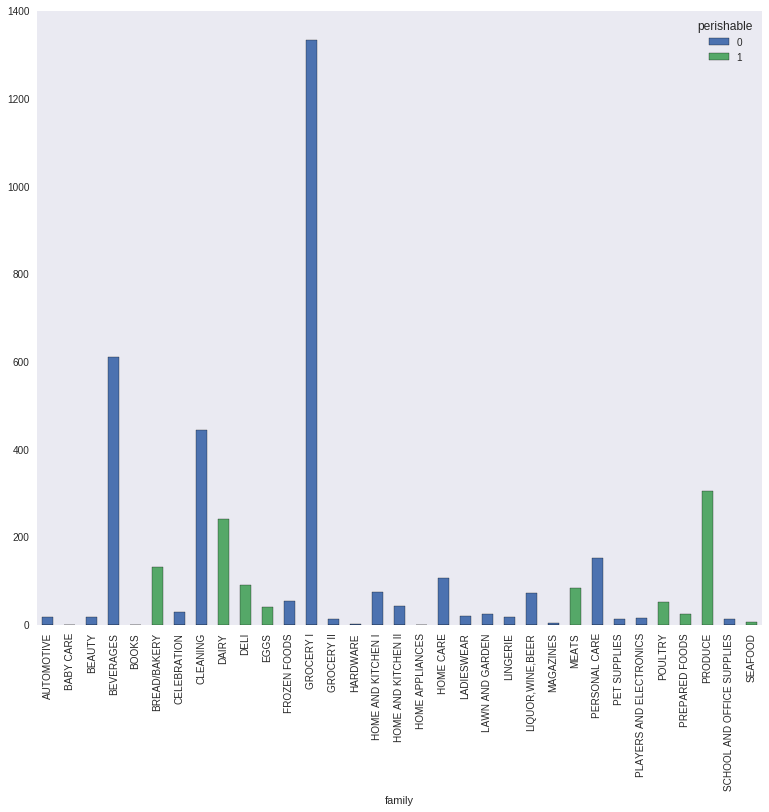

In [111]:
family_perish= items.groupby(['family','perishable']).size()
family_perish.unstack().plot(kind='bar',stacked=True, figsize=(13,11),  grid=False)


### Ok, most of the product are grocery I, beverage and cleaning. All product family either perishable or not ###

In [61]:
transact=pd.read_csv('transactions.csv',parse_dates=['date'])

In [62]:
transact.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [63]:
transact.shape

(83488, 3)

In [98]:
transact_cut=transact[(transact['date']>pd.Timestamp('2016-01-01')) & (transact['date']<pd.Timestamp('2016-10-01'))]

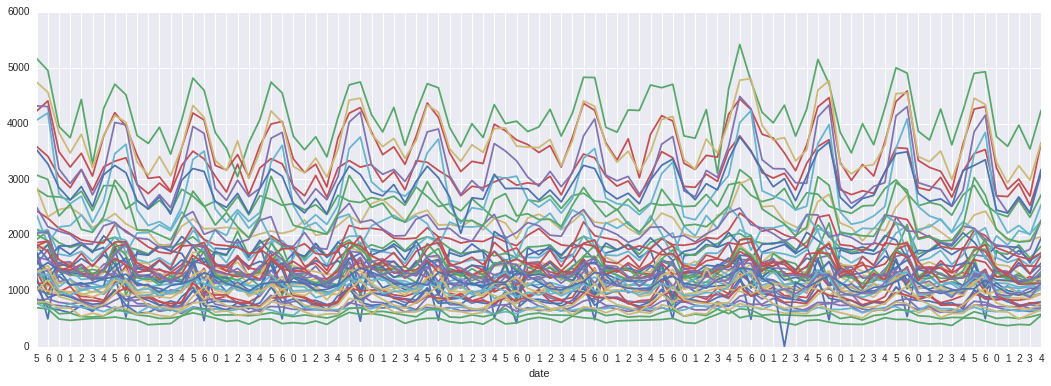

In [65]:
fig, ax = plt.subplots(figsize=(18,6))
for name, group in transact_cut.groupby('store_nbr'):
    group.plot(x=(group['date']), y='transactions',ax=ax)
    ax.legend_.remove()
xs = sorted(ax.get_xticks(minor='both'))
wd = pd.Series(transact_cut.date.unique()).map(pd.Timestamp.weekday)
ax.set_xticks(xs)
ax.set_xticks([], minor=True)
ax.set_xticklabels(wd)#[weekday_map[d] for d in wd])  

#ax.set_xticklabels(label


### This looks weird, seems that for some stores the rate of transactions was growing on saturdays, while for others going down ###

In [66]:
transact_cut.groupby('store_nbr').agg({'transactions':'mean'}).sort_values(by='transactions',ascending=False)

,transactions
store_nbr,
44,4151.285714
47,3701.307692
45,3611.274725
46,3223.692308
3,3084.626374
49,2884.879121
48,2801.098901
8,2601.131868
50,2384.351648


### Lets try to divide data in 3 groups, the one that medium on weekends was bigger than on workdays, smaller or not changed ###

In [100]:
transact_cut['day_of_week']=transact_cut['date'].apply(pd.Timestamp.weekday)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


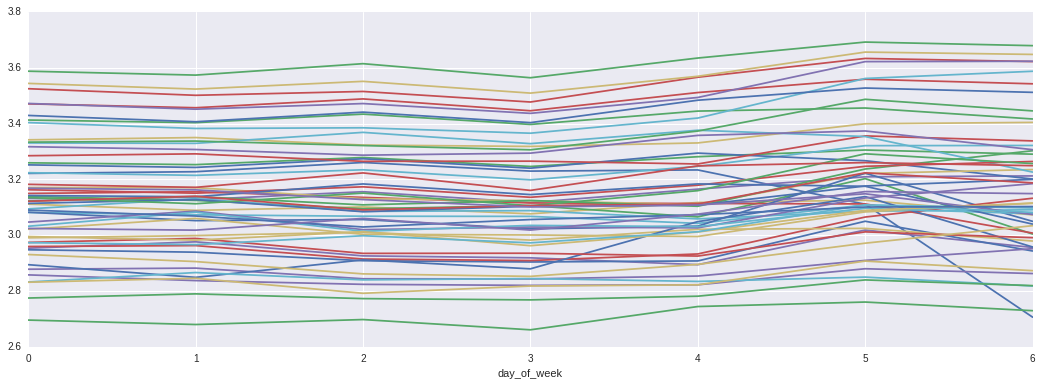

In [101]:
fig, ax = plt.subplots(figsize=(18,6))

transact_mean=transact_cut[['store_nbr','transactions','day_of_week']].groupby(
    ['store_nbr','day_of_week']).agg({'transactions':lambda x:np.log10(np.mean(x))}).unstack()['transactions']
for i in transact_mean.index:
    transact_mean.loc[i].plot(ax=ax)

### Obviously day of weak is important factor for some of the stores, we will have to add it as a feature ###

In [8]:
holidays=pd.read_csv('holidays_events.csv',parse_dates=['date'])

In [10]:
holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


In [104]:
holidays.shape

(350, 6)

In [11]:
holidays_cut=holidays[holidays['date']>pd.Timestamp('2016-01-01')]

In [16]:
holidays_cut

,date,type,locale,locale_name,description,transferred
212,2016-02-08,Holiday,National,Ecuador,Carnaval,False
213,2016-02-09,Holiday,National,Ecuador,Carnaval,False
214,2016-03-02,Holiday,Local,Manta,Fundacion de Manta,False
215,2016-03-25,Holiday,National,Ecuador,Viernes Santo,False
216,2016-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
217,2016-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
218,2016-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
219,2016-04-16,Event,National,Ecuador,Terremoto Manabi,False
220,2016-04-17,Event,National,Ecuador,Terremoto Manabi+1,False
221,2016-04-18,Event,National,Ecuador,Terremoto Manabi+2,False


In [17]:
np.zeros((10000,50000))

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [110]:
holidays_cut[holidays_cut['transferred'] !=False]

,date,type,locale,locale_name,description,transferred
255,2016-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
266,2016-07-25,Holiday,Local,Guayaquil,Fundacion de Guayaquil,True
268,2016-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True
297,2017-01-01,Holiday,National,Ecuador,Primer dia del ano,True
303,2017-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,True
312,2017-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
324,2017-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True
328,2017-09-28,Holiday,Local,Ibarra,Fundacion de Ibarra,True
340,2017-12-06,Holiday,Local,Quito,Fundacion de Quito,True


In [111]:
holidays_cut[holidays_cut['type'] =='Transfer']

,date,type,locale,locale_name,description,transferred
256,2016-05-27,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
265,2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False
269,2016-08-12,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False
298,2017-01-02,Transfer,National,Ecuador,Traslado Primer dia del ano,False
304,2017-04-13,Transfer,Local,Cuenca,Fundacion de Cuenca,False
313,2017-05-26,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
325,2017-08-11,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False
329,2017-09-29,Transfer,Local,Ibarra,Fundacion de Ibarra,False
342,2017-12-08,Transfer,Local,Quito,Traslado Fundacion de Quito,False


In [113]:
holidays_cut.drop(holidays_cut[holidays_cut['transferred'] !=False].index)

,date,type,locale,locale_name,description,transferred
212,2016-02-08,Holiday,National,Ecuador,Carnaval,False
213,2016-02-09,Holiday,National,Ecuador,Carnaval,False
214,2016-03-02,Holiday,Local,Manta,Fundacion de Manta,False
215,2016-03-25,Holiday,National,Ecuador,Viernes Santo,False
216,2016-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
217,2016-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
218,2016-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
219,2016-04-16,Event,National,Ecuador,Terremoto Manabi,False
220,2016-04-17,Event,National,Ecuador,Terremoto Manabi+1,False
221,2016-04-18,Event,National,Ecuador,Terremoto Manabi+2,False


In [19]:
df=pd.DataFrame([[i] for i in range(10)], columns=['num'])

,num
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


Object `df.agg` not found.
